<a href="https://colab.research.google.com/github/MahiraPutri149/PresidentialElectionEnthusiasm-Indonesia-2024/blob/main/PresidentialElectionEnthusiast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT DATA MINING**
# Latar Belakang

Di era berkembangnya teknologi informasi, media sosial menjadi 'amunisi' ampuh untuk memikat generasi muda terutama untuk meningkatkan partisipasi dalam ajang Pemilihan Presiden 2024 yang akan datang. Berdasarkan data yang berhasil diperoleh dari We Are Social, hampir 70% masyarakat Indonesia adalah pengguna media sosial, dengan 88.5% berusia 13 tahun ke atas (usia produktif), hal ini menjadi peluang besar untuk melakukan kampanye politik demi memenangkan Pemilihan Presiden 2024. Oleh karena itu, kami tertarik untuk membahas analisis sentimen masyrakat mengenai Pemilihan Presiden 2024 melalu media sosial Twitter.

Twitter digunakan karena memiliki data berbentuk teks secara real time. Selain itu twitter dinilai sebagai tempat untuk memperoleh informasi yg lebih baik dibanding media sosial lain karena trend informasi di twitter memiliki persebaran yang cepat.

# Import Library

In [ ]:
! pip install sastrawi
! pip install unidecode
! pip install unidecode
!pip3 install snscrape
! pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import nest_asyncio
import itertools, re, nltk
import os
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from google.colab import files
nest_asyncio.apply()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import svm

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

'Done'

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!wget https://raw.githubusercontent.com/riochr17/Analisis-Sentimen-ID/master/kamus/positif_ta2.txt
!wget https://raw.githubusercontent.com/riochr17/Analisis-Sentimen-ID/master/kamus/negatif_ta2.txt

--2022-12-30 07:13:02--  https://raw.githubusercontent.com/riochr17/Analisis-Sentimen-ID/master/kamus/positif_ta2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17431 (17K) [text/plain]
Saving to: ‘positif_ta2.txt.1’

positif_ta2.txt.1   100%[===================>]  17.02K  --.-KB/s    in 0s      

2022-12-30 07:13:02 (68.5 MB/s) - ‘positif_ta2.txt.1’ saved [17431/17431]

--2022-12-30 07:13:02--  https://raw.githubusercontent.com/riochr17/Analisis-Sentimen-ID/master/kamus/negatif_ta2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

# Scrape Data

Kami melakukan scrapping data dari Twitter menggunakan TwitterSearchScrapper dengan menggunakan keywords **"politik pilpres"**.

In [ ]:
# Membuat list untuk append data tweet
# tweets_list2 = []

# Menggunakan TwitterSearchScraper untuk scrape data dan append tweets ke list
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('politik pilpres since:2020-01-01 until:2022-12-27').get_items()):
#     if i>10100:
#         break
#     tweets_list2.append([tweet.id, tweet.date, tweet.content, tweet.user.username])

# Membuat dataframe dari list tweets di atas
# tweets_df2 = pd.DataFrame(tweets_list2, columns=['ID','Datetime','Text', 'Username'])

# Load Data

In [ ]:
# Loading data hasil scrapping twitter dengan keywords 'politik pilpres'
df = pd.read_csv('https://raw.githubusercontent.com/MahiraPutri149/PresidentialElectionEnthusiasm-Indonesia-2024/main/data.txt')
df.head(5)

,Unnamed: 0,ID,Datetime,Text,Username
0,0,1607513431959306243,2022-12-26 23:07:22+00:00,"Pengamat politik dari LIPI, Indria Samego, men...",Rosanjaya10
1,1,1607511125977100290,2022-12-26 22:58:13+00:00,MAU IBADAH NATAL SAJA SUSAH - WASPADAI PENDUKU...,info62id
2,2,1607417381965672448,2022-12-26 16:45:42+00:00,"Menuju Pilpres 2024, berkembang wacana untuk m...",Kuyangpargoyy
3,3,1607416700370292736,2022-12-26 16:43:00+00:00,Puan Maharani yang ditugaskan untuk safari pol...,Krissbee19
4,4,1607405952759914498,2022-12-26 16:00:17+00:00,"Pengamat politik dari LIPI, Indria Samego, men...",Ciripaa_


# Preprocessing Text

## Cleansing Data

In [ ]:
# Loading Stopwords
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# Menambahkan Stopwords
Sastrawi_StopWords_id.add('tak')
Sastrawi_StopWords_id.add('aja')
Sastrawi_StopWords_id.add('mau')
Sastrawi_StopWords_id.add('jadi')
Sastrawi_StopWords_id.add('jangan')
Sastrawi_StopWords_id.add('pak')
Sastrawi_StopWords_id.add('main')
Sastrawi_StopWords_id.add('bukan')
Sastrawi_StopWords_id.add('makin')
Sastrawi_StopWords_id.add('nya')

In [ ]:
# Membuat dictionary sederhana berisi daftar singkatan dan kepanjangannya
slangS = {'gan':'juragan', 'yg':'yang', 'dg': 'dengan', 'bgt':'banget', 'dgn':'dengan', 'u': 'you', 'ndak':'tidak',
          'sesok':'besok', 'pd': 'pada', 'utk': 'untuk', 'kpd': 'kepada', 'sbg':'sebagai', 'dpt': 'dapat', 'dlm':'dalam',
          'jg':'juga', 'kpn': 'kapan', 'dmn':'dimana', 'jgn':'jangan', 'bngt':'banget', 'tnp':'tanpa', 'krn':'karena',
          'alt': 'alat', 'ttp': 'tetapi', 'tp':'tapi', 'bnyk': 'banyak', 'cept':'cepat', 'dn':'dan', 'propgnda':'propaganda',
          'ingt':'ingat', 'rkyat':'rakyat', 'shg':'sehingga', 'udh':'udah', 'kli':'kali', 'bsa':'bisa', 'klw':'kalau',
          'klo':'kalau', 'nga':'tidak', 'mliht':'melihat', 'pmimpin':'pemimpin', 'bukn':'bukan', 'identits':'identitas', 'tdk':'tidak',
          'org':'orang', 'sp':'siapa', 'dr':'dari', 'mw':'mau', 'gk':'tidak', 'tsb':'tersebut', 'rkyt':'rakyat',
          'smga':'semoga', 'sgla':'segala', 'klau':'kalau', 'tdak':'tidak', 'klu':'kalau', 'jg':'juga', 'kluyuran':'keluyuran',
          'dst':'dan seterusnya', 'spt':'seperti', 'tsb':'tersebut', 'pdhl':'padahal', 'hrs':'harus', 'emg':'memang', 'sgnt':'sangat'} #dictionary sederhana berisi daftar singkatan dan kepanjangannya

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    for i,t in enumerate(Tokens):
      if t in slangS.keys():
        Tokens[i] = slangS[t]
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

In [ ]:
# Cleansing Data
df['clean_tweet'] = '' # inititate kolom kosong
for i, post in tqdm(df.iterrows()):
    df.at[i, 'clean_tweet'] = cleanText(post.Text)
df.head()

10101it [38:25,  4.38it/s]


,Unnamed: 0,ID,Datetime,Text,Username,clean_tweet
0,0,1607513431959306243,2022-12-26 23:07:22+00:00,"Pengamat politik dari LIPI, Indria Samego, men...",Rosanjaya10,amat politik lipi indria samego nilai pdip mun...
1,1,1607511125977100290,2022-12-26 22:58:13+00:00,MAU IBADAH NATAL SAJA SUSAH - WASPADAI PENDUKU...,info62id,ibadah natal susah waspada dukung bapak politi...
2,2,1607417381965672448,2022-12-26 16:45:42+00:00,"Menuju Pilpres 2024, berkembang wacana untuk m...",Kuyangpargoyy,tuju pilpres 2024 kembang wacana duet puan mah...
3,3,1607416700370292736,2022-12-26 16:43:00+00:00,Puan Maharani yang ditugaskan untuk safari pol...,Krissbee19,puan maharani tugas safari politik nilai sinya...
4,4,1607405952759914498,2022-12-26 16:00:17+00:00,"Pengamat politik dari LIPI, Indria Samego, men...",Ciripaa_,amat politik lipi indria samego nilai pdip mun...


## Drop Duplicate

In [ ]:
df['clean_tweet'].duplicated().sum()

2118

In [ ]:
df = df.drop_duplicates(subset=['clean_tweet'])
df['clean_tweet'].duplicated().sum()

0

# Tweet Classification

Kami akan mengklasifikasikan tweet menjadi 3 kelompok sentimen, yaitu tweet dengan sentimen positif, negatif, dan netral.




In [ ]:
# Membuat list berisikan clean_tweet
tweet_list = df['clean_tweet'].values.tolist()

In [ ]:
# Memperoleh barisan kata-kata positif dan negatif
positive_word = open("positif_ta2.txt","r")
pos_word = positive_word.readlines()
negative_word = open("negatif_ta2.txt","r")
neg_word = negative_word.readlines()

Sentiment = []
Negation = ['tidak', 'lawan', 'anti', 'belum', 'belom', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sebelum']

# Tokenization
for i in tweet_list:
    print(i.strip())
    tweets = i.strip().split()
    count_p = 0 # nilai positif
    count_n = 0 # nilai negatif

    for tweet in tweets:
        for positive_word in pos_word:
            if positive_word.strip().lower() == tweet.lower():
                #items.index(item)-1 digunakan untuk mencari nilai index sebelum index positifnya
                if tweet_list[tweet_list.index(i)-1] in Negation:
                    print(tweet_list[tweet_list.index(i)-1], positive_word, ['negatif'])
                    count_n += 1
                else:
                    print(positive_word, ['positif'])
                    count_p += 1
        for negative_word in neg_word:
            if negative_word.strip().lower() == tweet.lower():
                if tweet_list[tweet_list.index(i)-1] in Negation:
                    print(tweet_list[tweet_list.index(i)-1], negative_word, ['positif'])
                    count_p += 1
                else:
                    print(negative_word, ['negatif'])
                    count_n += 1

    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    Sentiment.append(count_p-count_n)

Output streaming akan dipotong hingga 5000 baris terakhir.
 ['negatif']
takut
 ['negatif']
kalah
 ['negatif']
kalah
 ['negatif']
radikal
 ['negatif']
radikal
 ['negatif']
intoleran
 ['negatif']
demokrasi
 ['positif']
demokrasi
 ['positif']
positif: 2
negatif: 8
dennysiregar7 menang pilpres lebih punya identitas identifikasi jelas identitas perang identitas jadi lawan politik
menang
 ['positif']
menang
 ['positif']
jelas
 ['positif']
jelas
 ['positif']
lawan
 ['negatif']
positif: 4
negatif: 1
dennysiregar7 takut politik indentitas bunga bunga serta calon pilpres partai mana liat ntar dah pilih anies pemerssaah
takut
 ['negatif']
pilih
 ['positif']
positif: 1
negatif: 1
kayak sekolah istilah alumni tuju apa ika ansor bentuk jangan2 penting politik tuju pilpres 2024 syukur ansor gerak cepat bubar acara ilegal gpansorsuroboyo mantap
penting
 ['positif']
penting
 ['positif']
cepat
 ['positif']
cepat
 ['positif']
bubar
 ['negatif']
ilegal
 ['negatif']
mantap
 ['positif']
mantap
 ['positif']


In [ ]:
count_tweet = pd.DataFrame(Sentiment, columns = ['sentimen'])

In [ ]:
# Mengubah nilai Sentiment ke kelompok Positif, Negatif, dan Netral.
def integer(x):
    if x < 0:
        return 'Negatif'
    if x == 0 :
        return 'Netral'
    if x > 0 :
        return 'Positif'

Sentiment = count_tweet.applymap(integer)
Sentiment.head()

In [ ]:
# Menggabungkan dataframe awal (df) dengan Sentiment
merged = pd.concat([df, Sentiment], axis=1)

In [ ]:
merged

,Unnamed: 0,ID,Datetime,Text,Username,clean_tweet,sentimen
0,0.0,1.607513e+18,2022-12-26 23:07:22+00:00,"Pengamat politik dari LIPI, Indria Samego, men...",Rosanjaya10,amat politik lipi indria samego nilai pdip mun...,Positif
1,1.0,1.607511e+18,2022-12-26 22:58:13+00:00,MAU IBADAH NATAL SAJA SUSAH - WASPADAI PENDUKU...,info62id,ibadah natal susah waspada dukung bapak politi...,Netral
2,2.0,1.607417e+18,2022-12-26 16:45:42+00:00,"Menuju Pilpres 2024, berkembang wacana untuk m...",Kuyangpargoyy,tuju pilpres 2024 kembang wacana duet puan mah...,Netral
3,3.0,1.607417e+18,2022-12-26 16:43:00+00:00,Puan Maharani yang ditugaskan untuk safari pol...,Krissbee19,puan maharani tugas safari politik nilai sinya...,Positif
4,NaN,NaN,NaN,NaN,NaN,NaN,Positif
...,...,...,...,...,...,...,...
10096,10096.0,1.534133e+18,2022-06-07 11:19:10+00:00,Pernyataan Presiden Jokowi dalam Rakernas Proj...,shae_ll,nyata presiden jokowi rakernas projo muncul be...,NaN
10097,10097.0,1.534128e+18,2022-06-07 11:01:23+00:00,Pengamat Sebut Duet Anies-Puan di Pilpres 2024...,pangisyarwi1,amat sebut duet anies puan pilpres 2024 lebih ...,NaN
10098,10098.0,1.534101e+18,2022-06-07 09:13:35+00:00,"8. Untuk @aniesbaswedan , selamat atas kesukse...",ardiriau4,aniesbaswedan selamat atas sukses formula exel...,NaN
10099,10099.0,1.534099e+18,2022-06-07 09:04:03+00:00,"Tiga Poros, Tiga Problem Politik.\n\nAgenda pe...",beritajatimcom,tiga poros tiga problem politik agenda pilih p...,NaN


In [ ]:
merged.isnull().sum()

Unnamed: 0     1771
ID             1771
Datetime       1771
Text           1771
Username       1771
clean_tweet    1771
sentimen       1771
dtype: int64

In [ ]:
merged.dropna(axis=0, inplace=True)
merged

,Unnamed: 0,ID,Datetime,Text,Username,clean_tweet,sentimen
0,0.0,1.607513e+18,2022-12-26 23:07:22+00:00,"Pengamat politik dari LIPI, Indria Samego, men...",Rosanjaya10,amat politik lipi indria samego nilai pdip mun...,Positif
1,1.0,1.607511e+18,2022-12-26 22:58:13+00:00,MAU IBADAH NATAL SAJA SUSAH - WASPADAI PENDUKU...,info62id,ibadah natal susah waspada dukung bapak politi...,Netral
2,2.0,1.607417e+18,2022-12-26 16:45:42+00:00,"Menuju Pilpres 2024, berkembang wacana untuk m...",Kuyangpargoyy,tuju pilpres 2024 kembang wacana duet puan mah...,Netral
3,3.0,1.607417e+18,2022-12-26 16:43:00+00:00,Puan Maharani yang ditugaskan untuk safari pol...,Krissbee19,puan maharani tugas safari politik nilai sinya...,Positif
5,5.0,1.607395e+18,2022-12-26 15:16:46+00:00,@Candra4smara Yohanes Anies Rasyid Baswedan su...,ababil_santoso,candra4smara yohanes anies rasyid baswedan sus...,Netral
...,...,...,...,...,...,...,...
7976,7976.0,1.549733e+18,2022-07-20 12:27:52+00:00,Mandat Politik Mega ke Puan Dinilai untuk Pers...,ivooxid,mandat politik mega puan nilai siap diri pilpres,Positif
7977,7977.0,1.549722e+18,2022-07-20 11:43:48+00:00,Safari Politik Puan Maharani Bentuk Persiapan ...,balipuspanews,safari politik puan maharani bentuk siap pdip ...,Netral
7978,7978.0,1.549717e+18,2022-07-20 11:23:55+00:00,Mandat Politik Megawati ke Puan: Pesan untuk P...,hajinewsonline,mandat politik megawati puan pesan siap diri p...,Positif
7980,7980.0,1.549704e+18,2022-07-20 10:34:24+00:00,(7)Ada yang bilang Rizieq masih sangat dibutuh...,fito_jefrico,bilang rizieq sangat butuh elit politik pentin...,Positif


In [ ]:
merged.isnull().sum()

Unnamed: 0     0
ID             0
Datetime       0
Text           0
Username       0
clean_tweet    0
sentimen       0
dtype: int64

In [ ]:
cleanTweet = merged["clean_tweet"]
sentimen = merged["sentimen"]

# Document Classification ~ Sentiment Analysis

In [ ]:
# Membagi data menjadi data train dan data test
seed = 99
testSize = 0.2

x_train, x_test, y_train, y_test = train_test_split(merged["clean_tweet"], merged["sentimen"],
                                                    test_size=testSize, random_state = seed)
print(x_train.shape, x_test.shape)

(4969,) (1243,)


In [ ]:
# Membentuk VSM

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True,
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

x_train = vsm.fit_transform(x_train)
x_test = vsm.transform(x_test)

print(x_train.shape, x_test.shape)

(4969, 15145) (1243, 15145)


In [ ]:
# K-Nearest Neighbor
model = neighbors.KNeighborsClassifier()
kNN = model.fit(x_train, y_train)
y_kNN = kNN.predict(x_test)

print('K-NEAREST NEIGHBOR RESULT:')
print('======================================================')
print('Akurasi = ', accuracy_score(y_test, y_kNN))
print('======================================================')
print('Confussion Matrix')
print(confusion_matrix(y_test, y_kNN))
print('======================================================')
print('Classification Report')
print(classification_report(y_test, y_kNN))

K-NEAREST NEIGHBOR RESULT:
Akurasi =  0.40627514078841515
Confussion Matrix
[[103  55 212]
 [ 66  26 135]
 [176  94 376]]
Classification Report
              precision    recall  f1-score   support

     Negatif       0.30      0.28      0.29       370
      Netral       0.15      0.11      0.13       227
     Positif       0.52      0.58      0.55       646

    accuracy                           0.41      1243
   macro avg       0.32      0.32      0.32      1243
weighted avg       0.39      0.41      0.39      1243



In [ ]:
NN = MLPClassifier()
NN.fit(x_train, y_train)
y_NN = NN.predict(x_test)

print('MultiLayer Percepton:')
print('======================================================')
print('Akurasi = ', accuracy_score(y_test, y_NN))
print('======================================================')
print('Confussion Matrix')
print('======================================================')
print(confusion_matrix(y_test, y_NN))
print('Classification Report')
print(classification_report(y_test, y_NN))

MultiLayer Percepton:
Akurasi =  0.4006436041834272
Confussion Matrix
[[ 92  57 221]
 [ 51  46 130]
 [174 112 360]]
Classification Report
              precision    recall  f1-score   support

     Negatif       0.29      0.25      0.27       370
      Netral       0.21      0.20      0.21       227
     Positif       0.51      0.56      0.53       646

    accuracy                           0.40      1243
   macro avg       0.34      0.34      0.34      1243
weighted avg       0.39      0.40      0.39      1243



In [ ]:
# Support Vector Machine
dSVM = svm.SVC()
dSVM.fit(x_train, y_train)

y_train_pred = dSVM.fit(x_train, y_train).predict(x_train)
y_test_pred = dSVM.fit(x_train, y_train).predict(x_test)

print('SUPPORT VECTOR MACHINE TRAINING RESULT:')
print('======================================================')
print('Accuracy:', dSVM.fit(x_train, y_train).score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n SUPPORT VECTOR MACHINE TESTING RESULT:')
print('======================================================')
print('Accuracy:', dSVM.fit(x_train, y_train).score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

SUPPORT VECTOR MACHINE TRAINING RESULT:
Accuracy: 0.8768363855906621
Classification Report --------------------------------
              precision    recall  f1-score   support

     Negatif       0.96      0.81      0.88      1383
      Netral       0.98      0.67      0.80       990
     Positif       0.82      0.99      0.90      2596

    accuracy                           0.88      4969
   macro avg       0.92      0.82      0.86      4969
weighted avg       0.89      0.88      0.87      4969

Confussion Matrix ------------------------------------
[[1118    7  258]
 [  29  664  297]
 [  13    8 2575]]

 SUPPORT VECTOR MACHINE TESTING RESULT:
Accuracy: 0.505229283990346
Classification Report --------------------------------
              precision    recall  f1-score   support

     Negatif       0.22      0.02      0.03       370
      Netral       0.17      0.01      0.02       227
     Positif       0.52      0.96      0.67       646

    accuracy                           0.51

SVM memiliki tingkat akurasi yang lebih tinggi daripada model algoritma lain, yaitu sebesar 76%, disusul oleh MLP sebesar 75%, dan KNN sebesar 53%.
Maka pemilihan model terbaik jatuh kepada SVM.

# Social Network Analysis (SNA)

## WordClouds with Voyant

Untuk memperlihatkan kata yang sering muncul pada tweet terkait keywords, kami menggunakan salah satu tools Voyant, yaitu WordClouds.

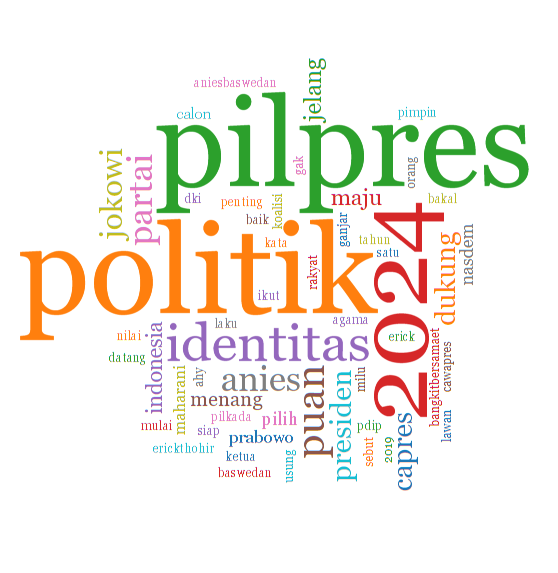

Interpretasi:

Dengan mengecualikan keywords, dari gambar di atas, dapat diketahui bahwa kata yang sering muncul pada tweet terkait *politik pilpres* adalah identitas, puan, jokowi, dan anies.

## WordLinks with Voyant

WordLink merupakan suatu tools Voyant, yang dapat digunakan untuk menganalisa kata yang sering berhubungan dengan kata lainnya pada tweet dengan keywords terkait.

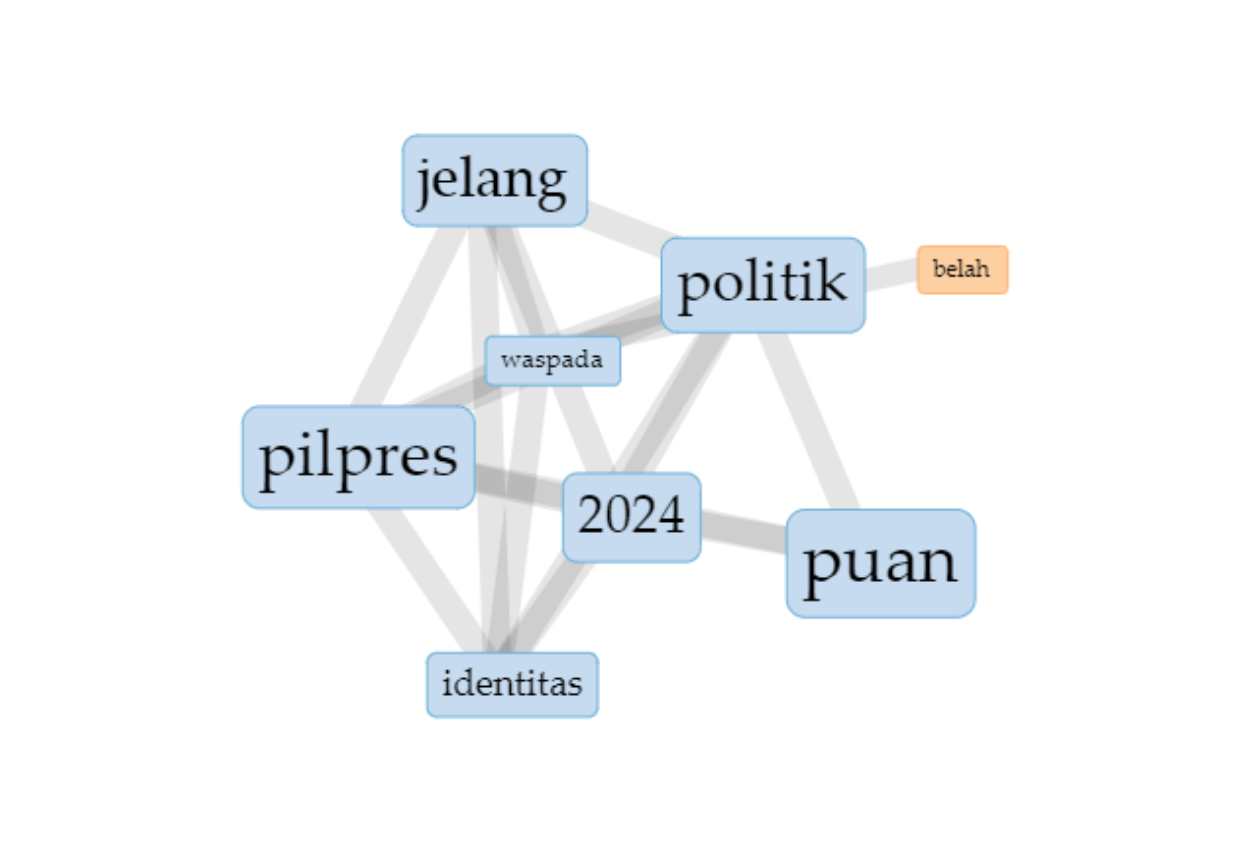

Interpretasi:

Dari WordLink di atas, terlihat bahwa kata yang sering berhubungan dengan keywords pada tweet adalah puan, jelang, identitas, waspada dan belah.

## Mention Analysis with Gephi

Kita akan menganalisa akun Twitter siapa sajakah yang sering di-*mention* oleh para pengguna Twitter ketika membuat *tweet* terkait keywords, "politik pilpres".

In [ ]:
users = df.Username.to_list()
tweets = df.Text.to_list()
print( users[:7] )

In [ ]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pilpres24.gexf")

Export ke GexF untuk di import ke Gephi


Dengan menggunakan bantuan Gephi, diperoleh graf sebagai berikut.

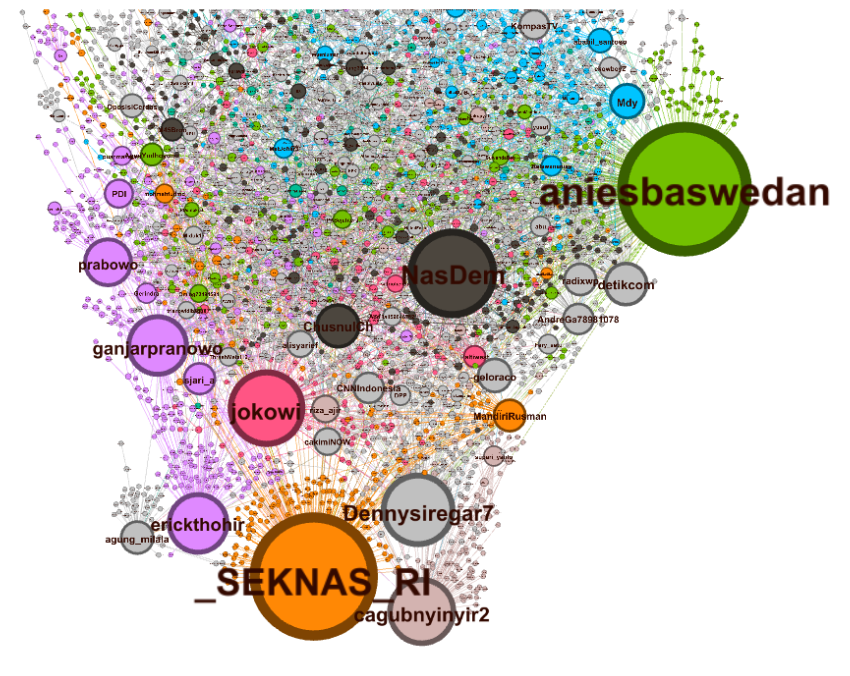

Interpretasi:

Dari graf di atas, dapat diketahui bahwa terdapat 5 pengguna Twitter yang sering disebut oleh *netizen* adalah _SEKNAS_RI, AniesBaswedan, jokowi, ganjarpranowo, dan NasDem.

# Kesimpulan

Dilihat berdasarkan postingan tweet masyarakat dari berbagai sentimen, masyarakat sangat antusias terhadap Pemilihan Presiden tahun 2024 dan antusiasme masyarakat cenderung positif.
Banyak kandidat yang melakukan kampanye dengan politik indentitas yang dianggap menghancurkan suasana demokrasi, sehingga masyarakat sangat mewaspadai akan terjadinya hal itu.

Gunakanlah sosial media dengan bijak sehingga tidak minumbulkan pertikaian.

